In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

# EDA and overview

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

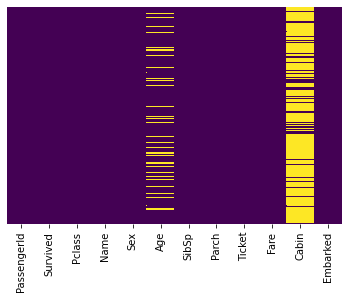

In [8]:
#Overview over missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
sns.set_style('whitegrid')

C:\Users\SolveigFrank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

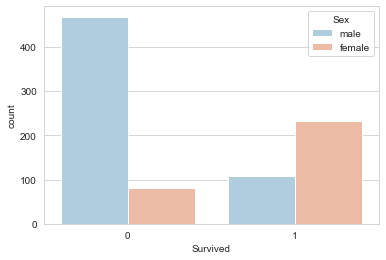

In [14]:
sns.countplot('Survived',data=train,hue='Sex',palette='RdBu_r')

C:\Users\SolveigFrank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

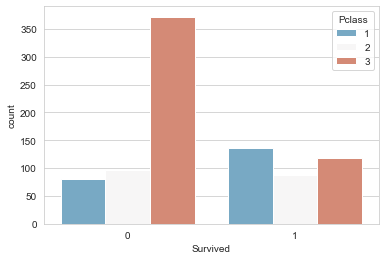

In [22]:
sns.countplot('Survived',data=train,hue='Pclass',palette='RdBu_r')

C:\Users\SolveigFrank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

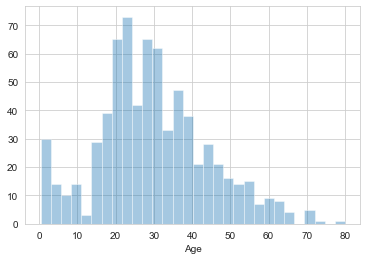

In [23]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

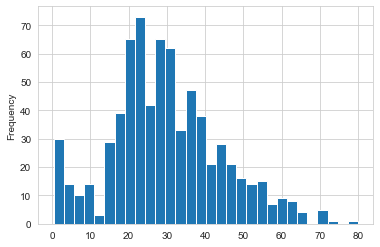

In [26]:
train['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

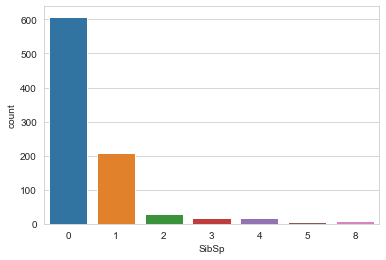

In [27]:
sns.countplot(x=train['SibSp'],data=train)

<AxesSubplot:>

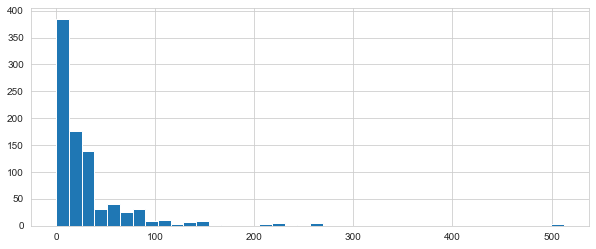

In [32]:
train['Fare'].hist(bins=40,figsize=(10,4))

# Data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

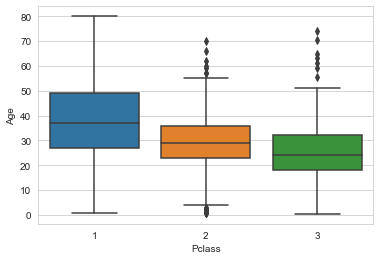

In [48]:
#simple imputation to fill in age n/a
sns.boxplot(x='Pclass',y='Age',data=train)

In [51]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [54]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

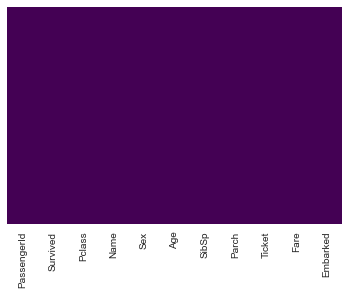

In [61]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
#cabin has too many missing values
train.drop('Cabin',axis=1,inplace=True)

In [60]:
#clean the rest
train.dropna(inplace=True)

In [64]:
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [66]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [67]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [68]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
train = pd.concat([train,sex,embark],axis=1)

In [75]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [71]:
#Dropping useless or hard to use columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [74]:
#Id and index are the same so we can remove it 
train.drop('PassengerId',axis=1,inplace=True)

# ML part

In [77]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel = LogisticRegression(max_iter=10000)

In [86]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [87]:
predictions = logmodel.predict(X_test)

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)